In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
mostrecent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recentdate = mostrecent[0]
recentdate

'2017-08-23'

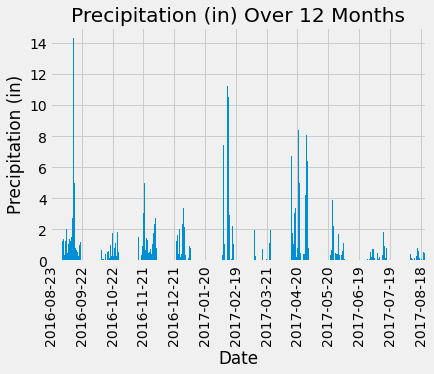

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_query, columns=["Date", "Precipitation (in)"])
precip = precip_df.groupby(by=["Date"]).sum()

# Sort the dataframe by date
prcp = precip.sort_values(by=["Date"])

# Use Pandas Plotting with Matplotlib to plot the data
prcp.plot.bar(ylabel="Precipitation (in)", legend=False, title="Precipitation (in) Over 12 Months")
plt.xticks(np.arange(0, 365, step=30))
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp["Precipitation (in)"].describe()

count    366.000000
mean       0.978907
std        1.776349
min        0.000000
25%        0.052500
50%        0.405000
75%        1.087500
max       14.280000
Name: Precipitation (in), dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_query = session.query(Station.station).count()
station_query

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
from sqlalchemy.sql import label
from sqlalchemy import desc
active_query = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
active_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowtemp = session.query(Measurement.tobs, func.min(Measurement.tobs)).filter_by(station="USC00519281").first()[0]
hightemp = session.query(Measurement.tobs, func.max(Measurement.tobs)).filter_by(station="USC00519281").first()[0]
avgtemp = session.query(Measurement.tobs, func.avg(Measurement.tobs)).filter_by(station="USC00519281").first()[0]
print(f"The low temp for station USC00519281 is {lowtemp}, the high is {hightemp}, and the average is {avgtemp}.")

The low temp for station USC00519281 is 54.0, the high is 85.0, and the average is 70.0.


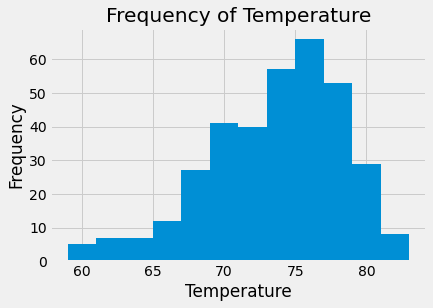

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query = session.query(Measurement.tobs).filter(Measurement.date >= year_ago).filter_by(station="USC00519281").all()

for x in range(len(temp_query)):
    temp_query[x] = temp_query[x][0]

plt.hist(temp_query, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Frequency of Temperature")
plt.show()

# Close session

In [16]:
# Close Session
session.close()